In [1]:
%%time
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), '../../../../'))
sys.path.append(work_path)
from helper.regrassion_t import *
from helper.plot_t import *
from helper.util import *
from helper.analysis import *

CPU times: total: 188 ms
Wall time: 283 ms


In [12]:
sb.__version__

'0.13.2'

In [2]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/boston.xlsx',info=False)
my_pretty_table(origin.head())

+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 | 

In [3]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = origin.drop(ignore, axis=1)
my_pretty_table(df.head())

+----+-------+-------+--------+-----------+---------+--------+
|    |   NOX |    RM |    DIS |   PTRATIO |   LSTAT |   MEDV |
|----+-------+-------+--------+-----------+---------+--------|
|  0 | 0.538 | 6.575 |   4.09 |      15.3 |    4.98 |     24 |
|  1 | 0.469 | 6.421 | 4.9671 |      17.8 |    9.14 |   21.6 |
|  2 | 0.469 | 7.185 | 4.9671 |      17.8 |    4.03 |   34.7 |
|  3 | 0.458 | 6.998 | 6.0622 |      18.7 |    2.94 |   33.4 |
|  4 | 0.458 | 7.147 | 6.0622 |      18.7 |    5.33 |   36.2 |
+----+-------+-------+--------+-----------+---------+--------+


In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='MEDV'
, scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((354, 13), (354,), (152, 13), (152,))

MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| 검증데이터 |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+------------

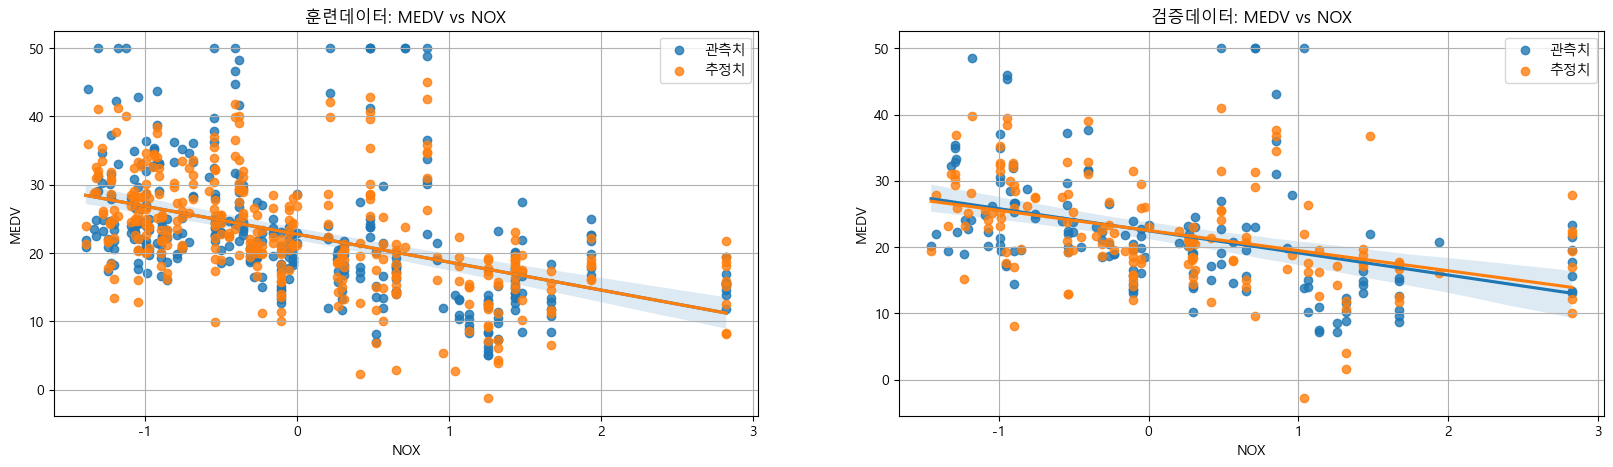

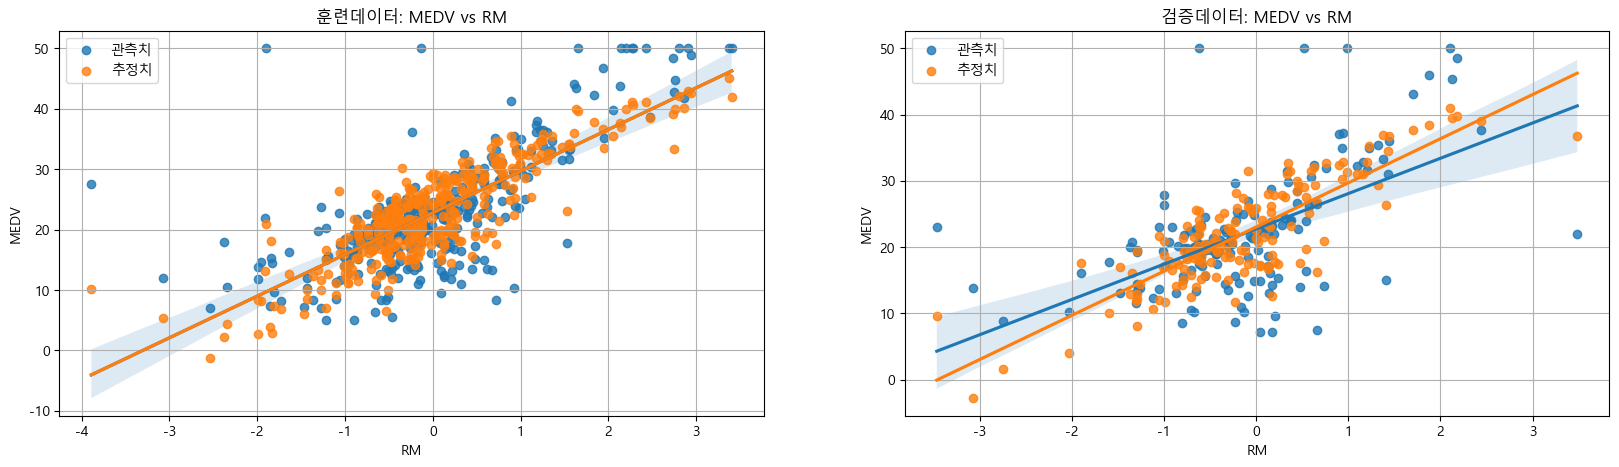

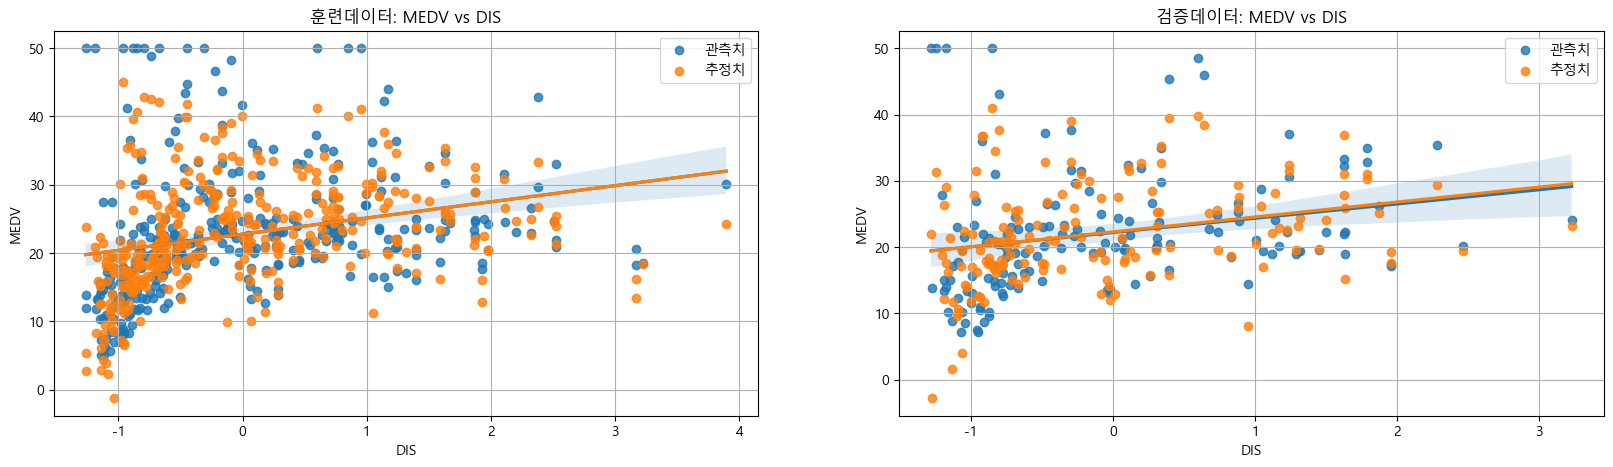

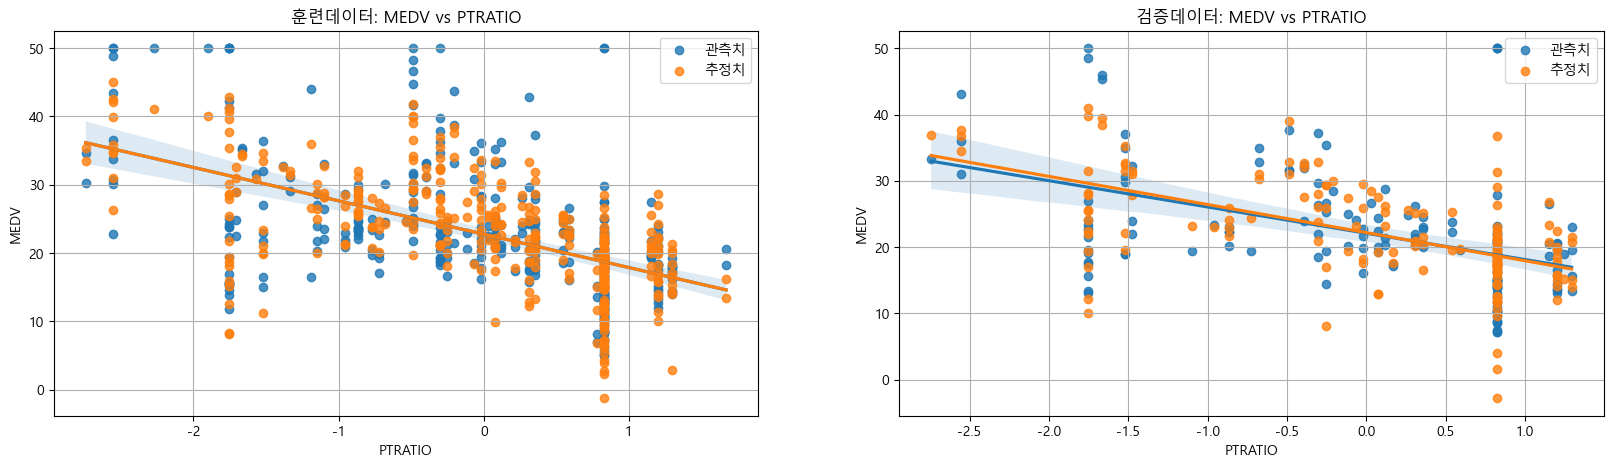

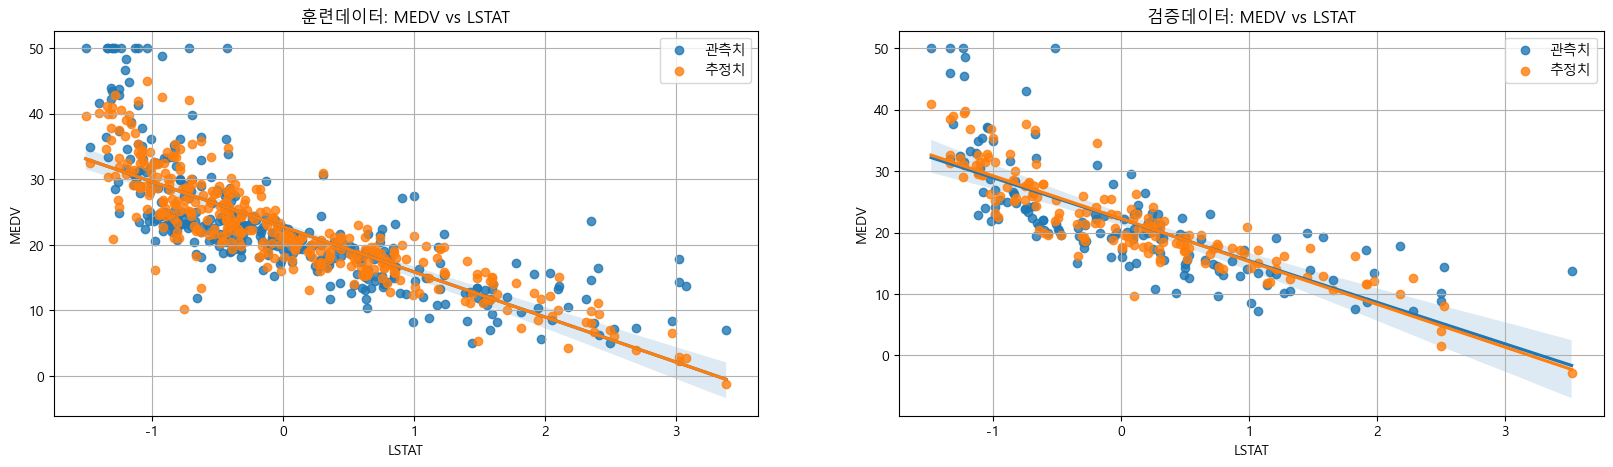

CPU times: total: 3.33 s
Wall time: 3.4 s


In [5]:
%%time

ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = origin.drop(ignore, axis=1)
x_train, x_test, y_train, y_test = my_train_test_split(df, yname="MEDV", scalling=True)

fit = my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=True, figsize=(10, 5), dpi=100)

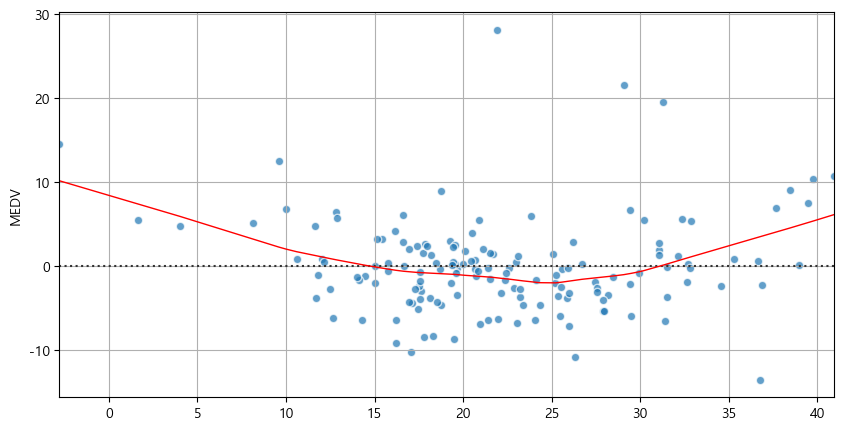

CPU times: total: 125 ms
Wall time: 125 ms


In [6]:
%%time

my_residplot(fit.y_test, fit.y_test_pred, lowess=True, figsize=(10, 5), dpi=100)

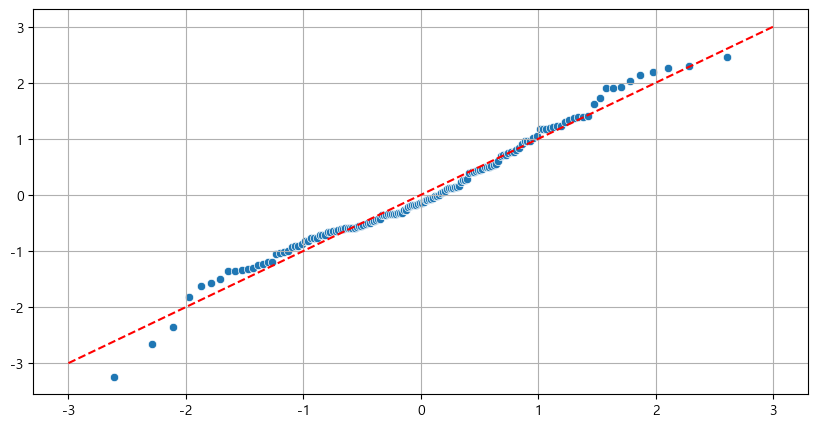

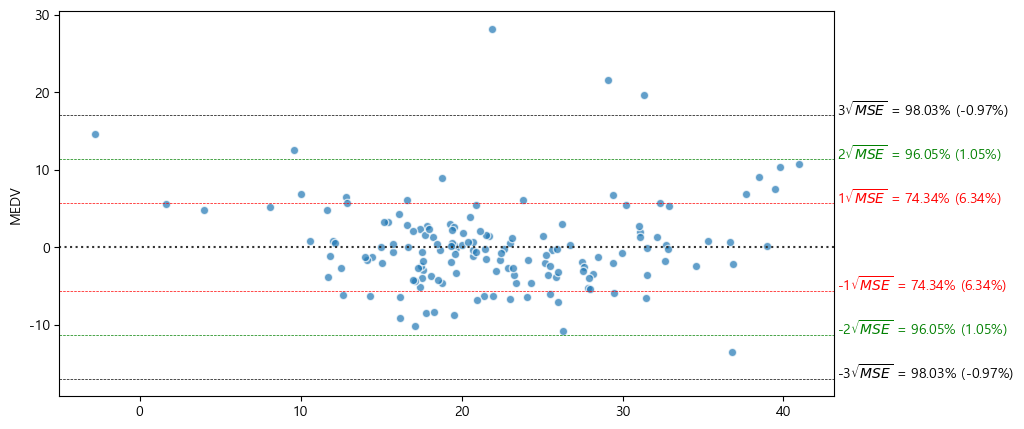

루트 1MSE 구간에 포함된 잔차 비율: 74.34% (6.3421052631579045)
루트 2MSE 구간에 포함된 잔차 비율: 96.05% (1.05263157894737)
루트 3MSE 구간에 포함된 잔차 비율: 98.03% (-0.973684210526315)
잔차의 정규성 가정 충족 여부: False
CPU times: total: 375 ms
Wall time: 381 ms


In [14]:
%%time

my_qqplot(fit.y_test_pred, figsize=(10, 5), dpi=100)
my_residplot(fit.y_test, fit.y_test_pred, mse=True, figsize=(10, 5), dpi=100)
my_resid_normality(fit.y_test, fit.y_test_pred)

In [8]:
%%time

my_resid_equal_var(fit.x_test, fit.y_test, fit.y_test_pred)

잔차의 등분산성 가정 충족 여부: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+
CPU times: total: 0 ns
Wall time: 2.99 ms


In [9]:
%%time

my_resid_independence(fit.y_test, fit.y_test_pred)

Durbin-Watson: 1.9279407375238424, 잔차의 독립성 가정 만족 여부: True
CPU times: total: 0 ns
Wall time: 0 ns


[잔차의 선형성 가정]


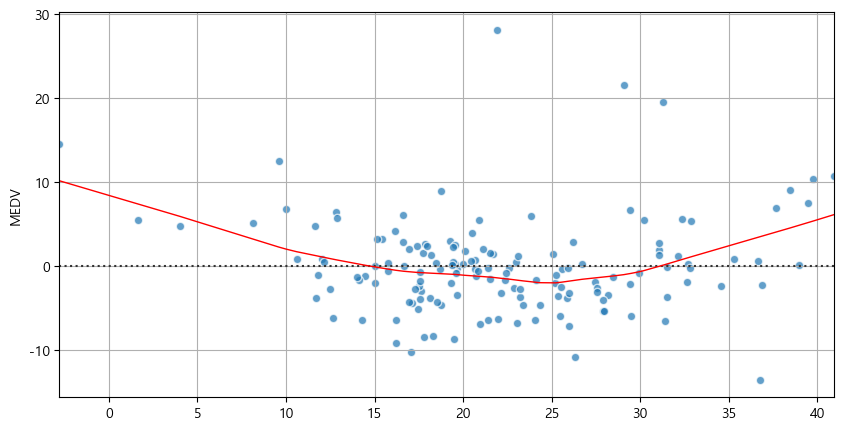


[잔차의 정규성 가정]


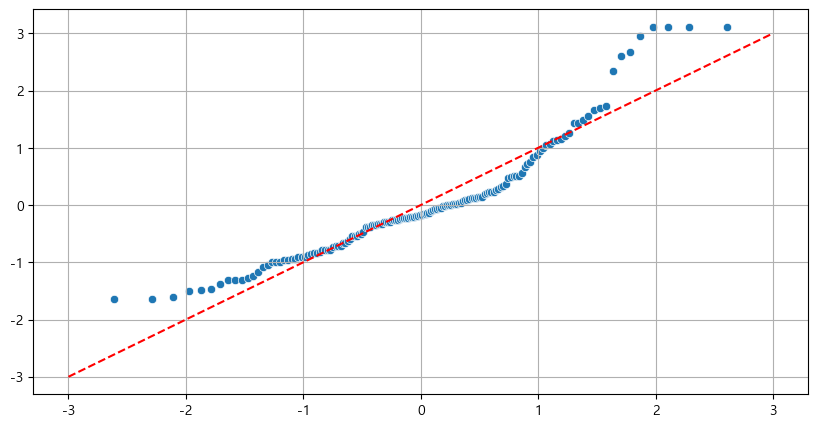

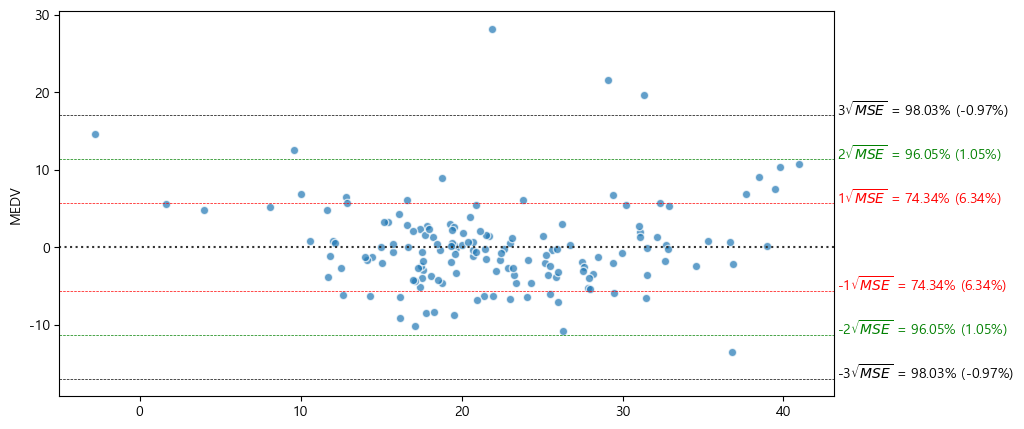

루트 1MSE 구간에 포함된 잔차 비율: 74.34% (6.3421052631579045)
루트 2MSE 구간에 포함된 잔차 비율: 96.05% (1.05263157894737)
루트 3MSE 구간에 포함된 잔차 비율: 98.03% (-0.973684210526315)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+

[잔차의 독립성 가정]
Durbin-Watson: 1.9279407375238424, 잔차의 독립성 가정 만족 여부: True
CPU times: total: 406 ms
Wall time: 446 ms


In [10]:
%%time

my_resid_test(fit.x_test, fit.y_test, fit.y_test_pred, figsize=(10, 5), dpi=100)

MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| 훈련데이터 |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| 검증데이터 |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
[훈련데이터에 대한 결과보고]
+----+------------

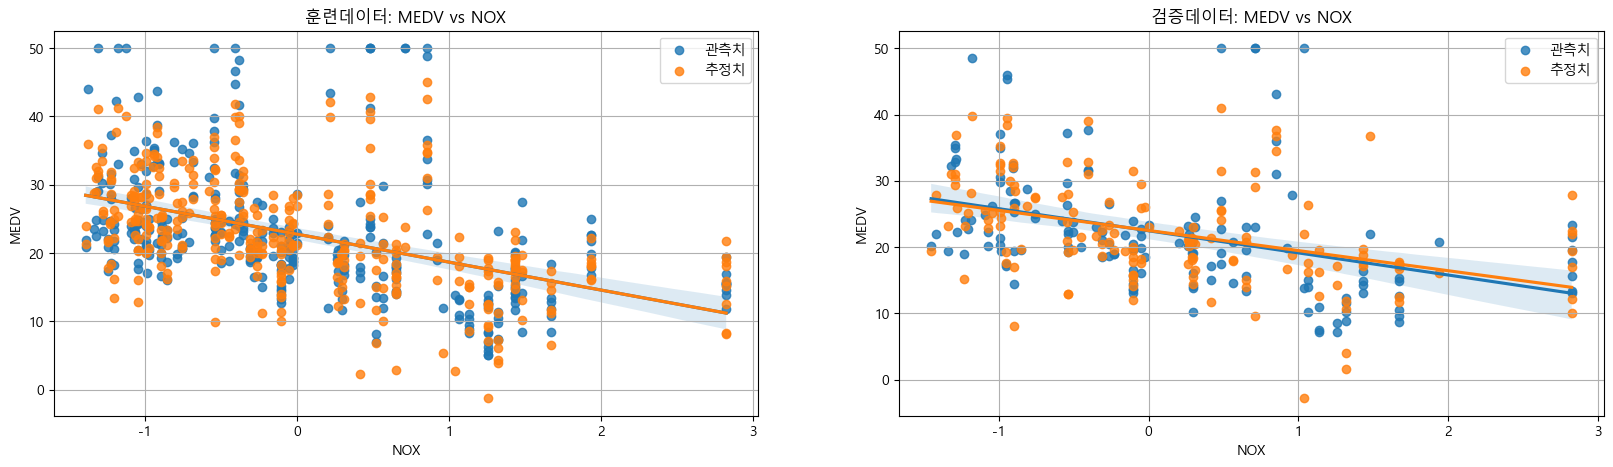

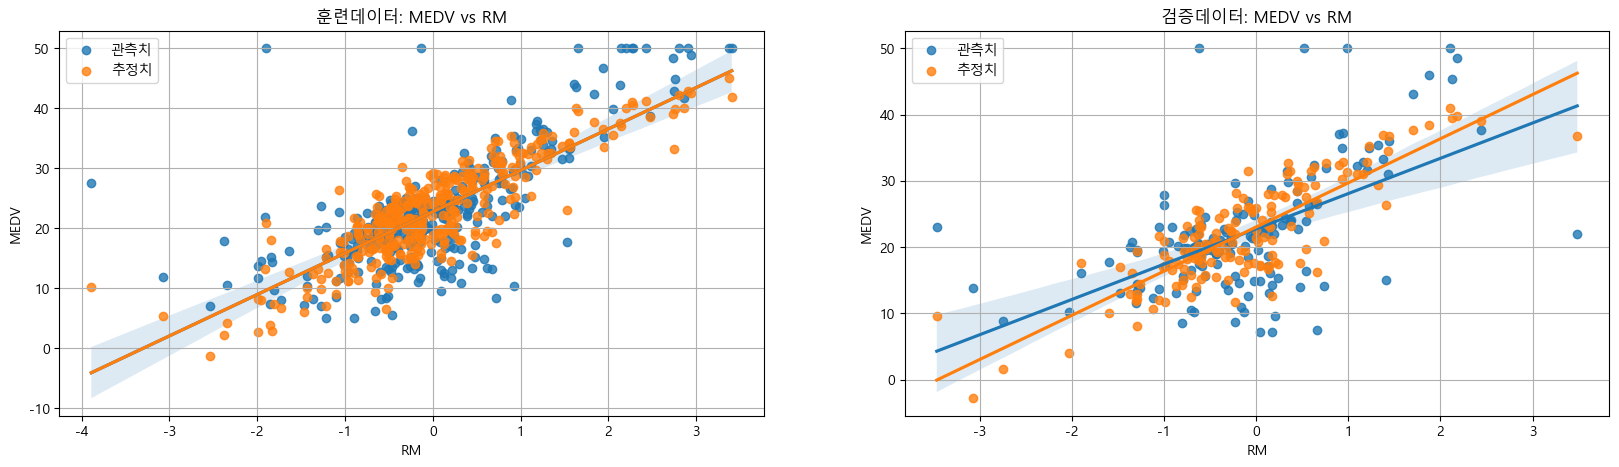

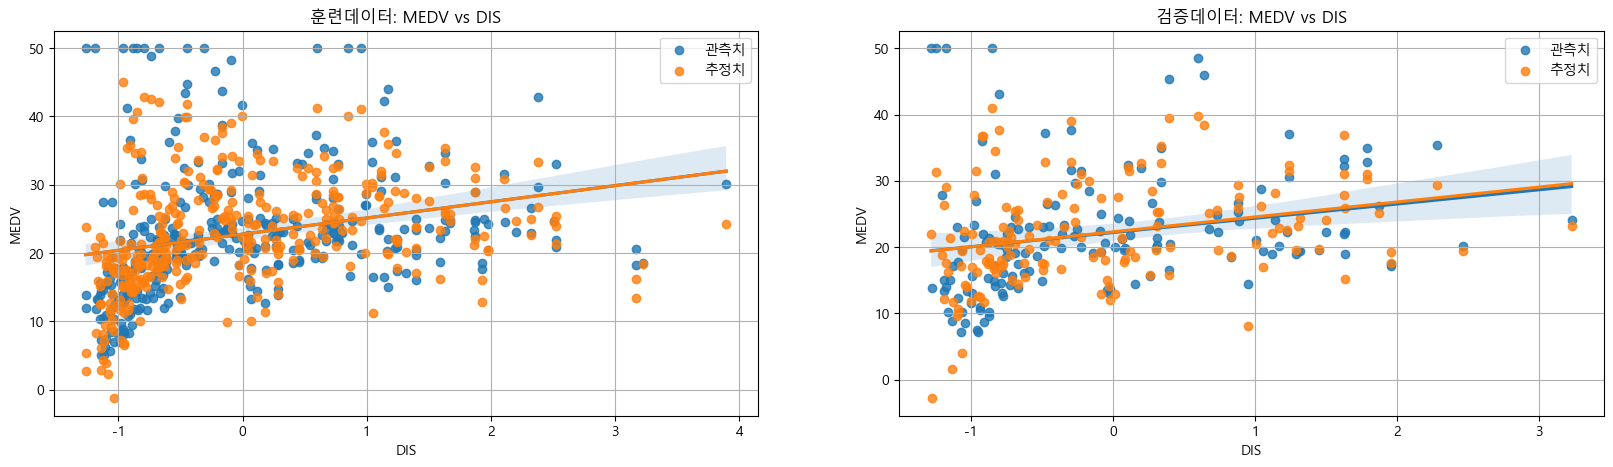

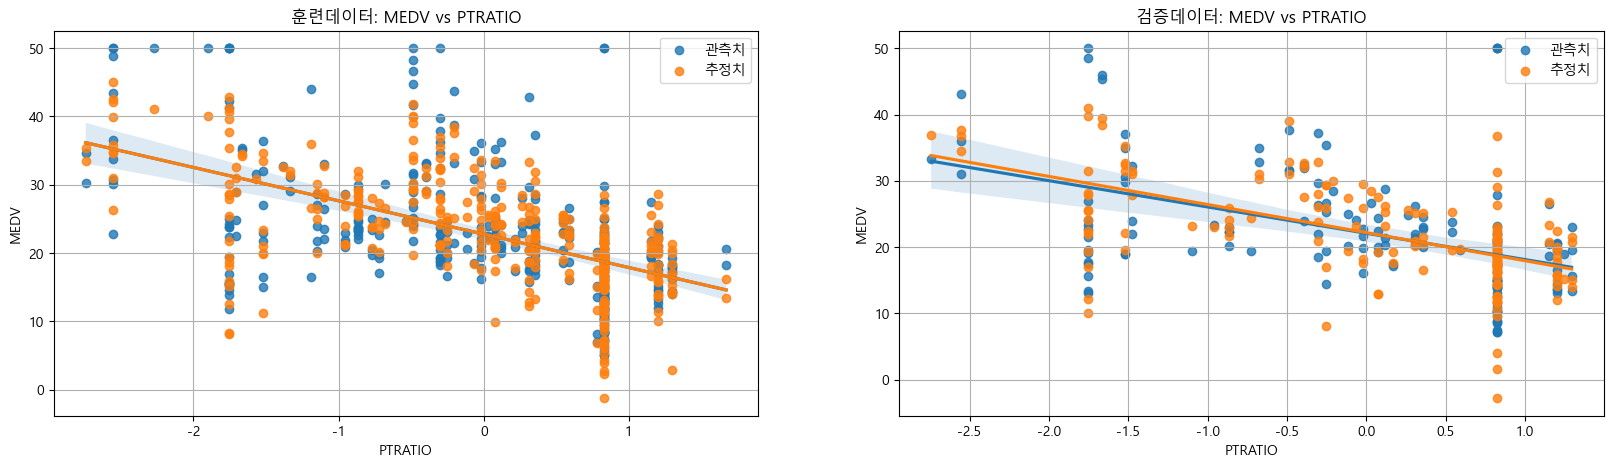

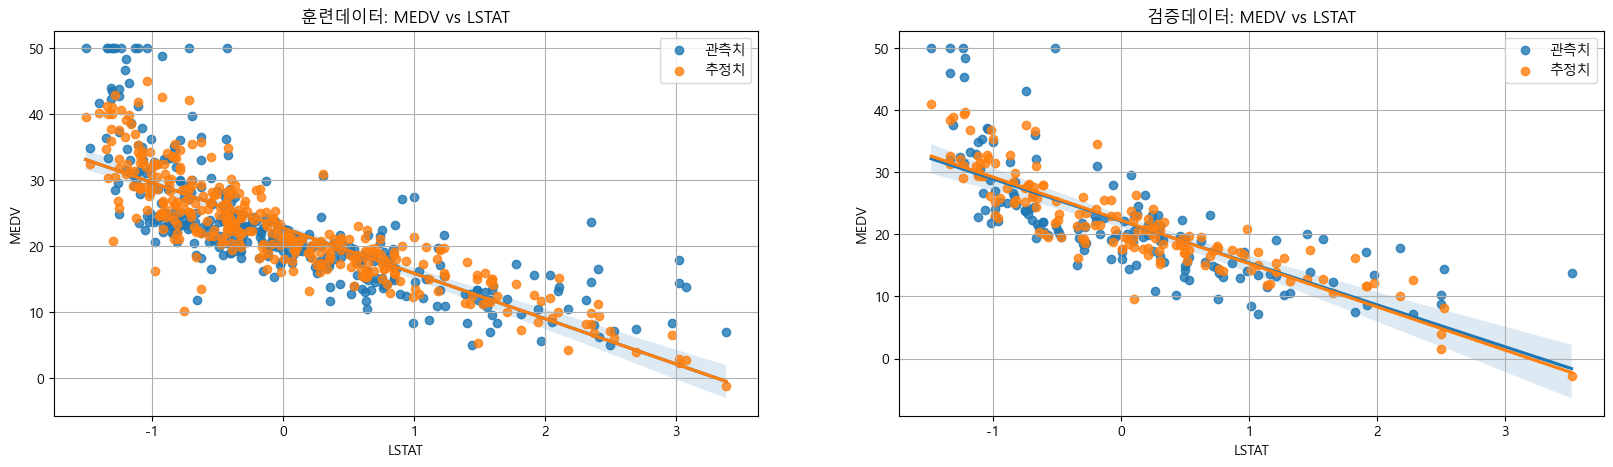



[훈련데이터에 대한 잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


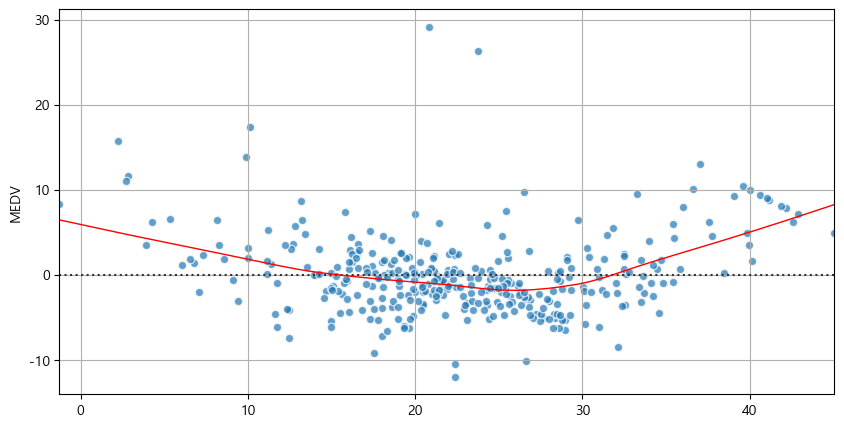


[잔차의 정규성 가정]


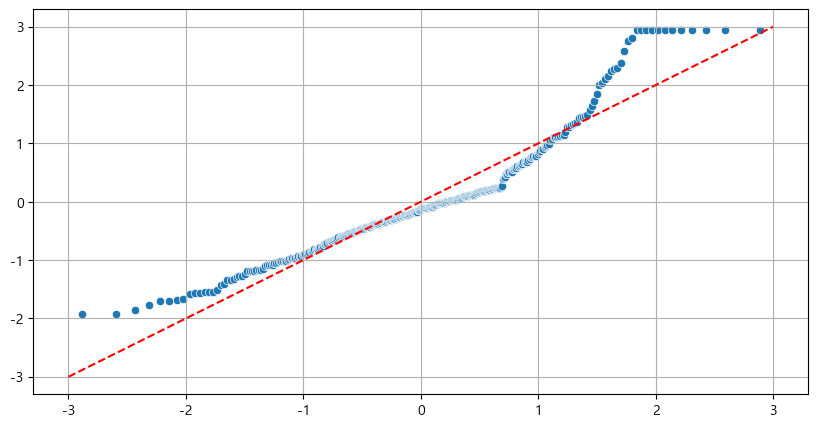

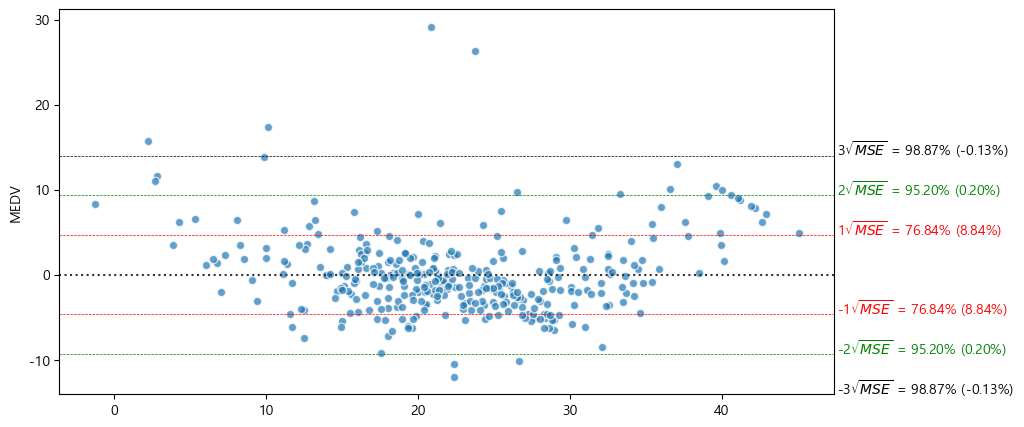

루트 1MSE 구간에 포함된 잔차 비율: 76.84% (8.836158192090394)
루트 2MSE 구간에 포함된 잔차 비율: 95.20% (0.197740112994353)
루트 3MSE 구간에 포함된 잔차 비율: 98.87% (-0.12994350282485811)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    17.6465 |
| p-value   | 0.00342368 |
| f-value   |     3.6515 |
| f p-value | 0.00311256 |
+-----------+------------+

[잔차의 독립성 가정]
Durbin-Watson: 2.124911983856234, 잔차의 독립성 가정 만족 여부: True


[검증데이터에 대한 잔차의 가정 확인] ==============================
[잔차의 선형성 가정]


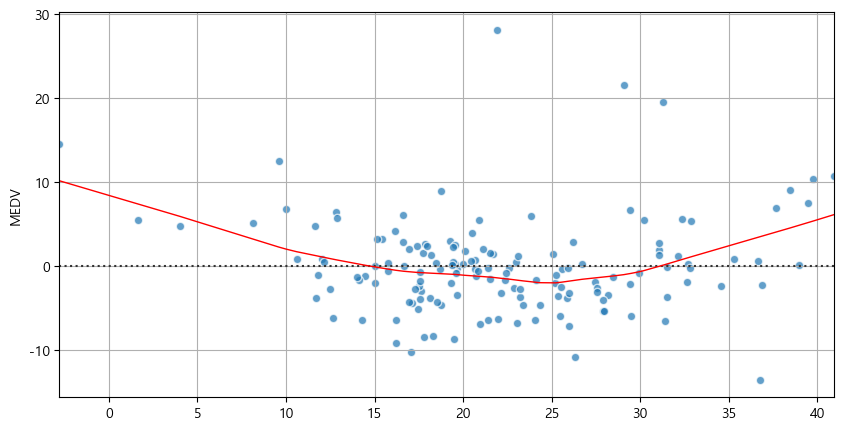


[잔차의 정규성 가정]


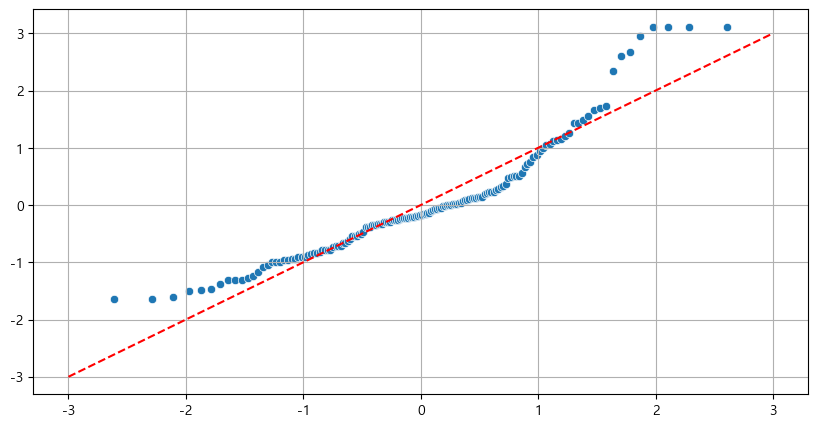

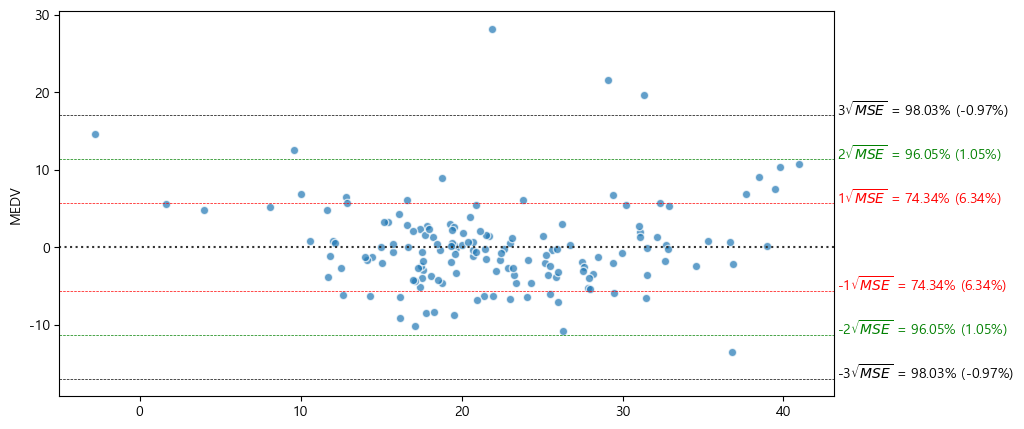

루트 1MSE 구간에 포함된 잔차 비율: 74.34% (6.3421052631579045)
루트 2MSE 구간에 포함된 잔차 비율: 96.05% (1.05263157894737)
루트 3MSE 구간에 포함된 잔차 비율: 98.03% (-0.973684210526315)
잔차의 정규성 가정 충족 여부: False

[잔차의 등분산성 가정]
잔차의 등분산성 가정 충족 여부: False
+-----------+------------+
|           |     values |
|-----------+------------|
| statistic |    15.8699 |
| p-value   | 0.00722541 |
| f-value   |    3.40411 |
| f p-value | 0.00613298 |
+-----------+------------+

[잔차의 독립성 가정]
Durbin-Watson: 1.9279407375238424, 잔차의 독립성 가정 만족 여부: True
CPU times: total: 4.19 s
Wall time: 4.36 s


LinearRegression()

In [11]:
%%time

my_linear_regrassion(x_train, y_train, x_test, y_test, use_plot=True, report=True, resid_test=True, figsize=(10, 5), dpi=100)